In [1]:
!pip install torch torchvision timm matplotlib

In [2]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from timm import create_model
from tqdm import tqdm
import os
import random
from sklearn.model_selection import train_test_split

In [3]:
# Set random seed
torch.manual_seed(42)
np.random.seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True

In [4]:
# Hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 15
num_classes = 2

In [5]:
# Device
from torchvision import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [7]:
#dataset_path
dataset_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset"
train_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset/train"
val_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset/val"


In [9]:
train_data = datasets.ImageFolder(root=train_path, transform=transform)
val_data = datasets.ImageFolder(root=val_path, transform=transform)


train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Load pre-trained ViT model
model = create_model('vit_base_patch16_224', pretrained=True)


model.head = nn.Sequential(
    nn.Dropout(p=0.3), 
    nn.Linear(model.head.in_features, num_classes)
)

model = model.to(device)


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Folder where results will be saved
save_path = "C:/Users/lamim/Desktop/N_Thesis/training_results4"

# Lists to store loss and accuracy for each epoch
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Start training and validation loop
for epoch in range(num_epochs):
    model.train()  # set model to training mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    # Loop through training batches
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and weight update
        loss.backward()
        optimizer.step()

        # Track training loss and correct predictions
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_preds += torch.sum(preds == labels).item()
        total_preds += labels.size(0)

    # Calculate average training loss and accuracy
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_preds / total_preds
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_preds = 0
    total_preds = 0
    with torch.no_grad():  # no gradient calculation during evaluation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)

    # Calculate average validation loss and accuracy
    val_loss /= len(val_loader)
    val_accuracy = correct_preds / total_preds
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# Save all results to a CSV file
df = pd.DataFrame({
    'Epoch': list(range(1, num_epochs + 1)),
    'Training Loss': train_losses,
    'Validation Loss': val_losses,
    'Training Accuracy': train_accuracies,
    'Validation Accuracy': val_accuracies
})
csv_path = f"{save_path}/training_results.csv"
df.to_csv(csv_path, index=False)
print(f"Results saved to {csv_path}")


 28%|██████████████████████▉                                                            | 8/28 [00:06<00:17,  1.23it/s]C:\Users\lamim\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:22<00:00,  1.30it/s]


Epoch 1/20, Loss: 0.9472, Accuracy: 0.5188
Validation Accuracy: 0.4554, Validation Loss: 0.7223


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.35it/s]


Epoch 2/20, Loss: 0.7250, Accuracy: 0.5487
Validation Accuracy: 0.5625, Validation Loss: 0.7361


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.37it/s]


Epoch 3/20, Loss: 0.6602, Accuracy: 0.5962
Validation Accuracy: 0.5982, Validation Loss: 0.7895


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.34it/s]


Epoch 4/20, Loss: 0.6527, Accuracy: 0.6305
Validation Accuracy: 0.5625, Validation Loss: 0.6883


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.36it/s]


Epoch 5/20, Loss: 0.6205, Accuracy: 0.6670
Validation Accuracy: 0.6964, Validation Loss: 0.6097


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.36it/s]


Epoch 6/20, Loss: 0.5955, Accuracy: 0.6814
Validation Accuracy: 0.6964, Validation Loss: 0.5850


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.43it/s]


Epoch 7/20, Loss: 0.5365, Accuracy: 0.7246
Validation Accuracy: 0.7411, Validation Loss: 0.5476


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:22<00:00,  1.31it/s]


Epoch 8/20, Loss: 0.3213, Accuracy: 0.8728
Validation Accuracy: 0.8214, Validation Loss: 0.3786


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:22<00:00,  1.31it/s]


Epoch 9/20, Loss: 0.3667, Accuracy: 0.8219
Validation Accuracy: 0.8214, Validation Loss: 0.4055


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.35it/s]


Epoch 10/20, Loss: 0.1856, Accuracy: 0.9237
Validation Accuracy: 0.7589, Validation Loss: 0.5104


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:22<00:00,  1.31it/s]


Epoch 11/20, Loss: 0.1335, Accuracy: 0.9480
Validation Accuracy: 0.8304, Validation Loss: 0.4179


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:22<00:00,  1.31it/s]


Epoch 12/20, Loss: 0.1132, Accuracy: 0.9580
Validation Accuracy: 0.7857, Validation Loss: 0.5913


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.42it/s]


Epoch 13/20, Loss: 0.1340, Accuracy: 0.9392
Validation Accuracy: 0.8214, Validation Loss: 0.4182


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.36it/s]


Epoch 14/20, Loss: 0.1100, Accuracy: 0.9668
Validation Accuracy: 0.7589, Validation Loss: 0.8167


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.40it/s]


Epoch 15/20, Loss: 0.1302, Accuracy: 0.9458
Validation Accuracy: 0.8482, Validation Loss: 0.5839


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.36it/s]


Epoch 16/20, Loss: 0.1001, Accuracy: 0.9755
Validation Accuracy: 0.8250, Validation Loss: 0.6035


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.36it/s]


Epoch 17/20, Loss: 0.0894, Accuracy: 0.9812
Validation Accuracy: 0.8304, Validation Loss: 0.6124


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.36it/s]


Epoch 18/20, Loss: 0.0827, Accuracy: 0.9848
Validation Accuracy: 0.8214, Validation Loss: 0.6352


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.36it/s]


Epoch 19/20, Loss: 0.0745, Accuracy: 0.9884
Validation Accuracy: 0.8179, Validation Loss: 0.6621


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.36it/s]


Epoch 20/20, Loss: 0.0662, Accuracy: 0.9917
Validation Accuracy: 0.8782, Validation Loss: 0.5839
Results saved to C:/Users/lamim/Desktop/N_Thesis/training_results4/training_results.csv


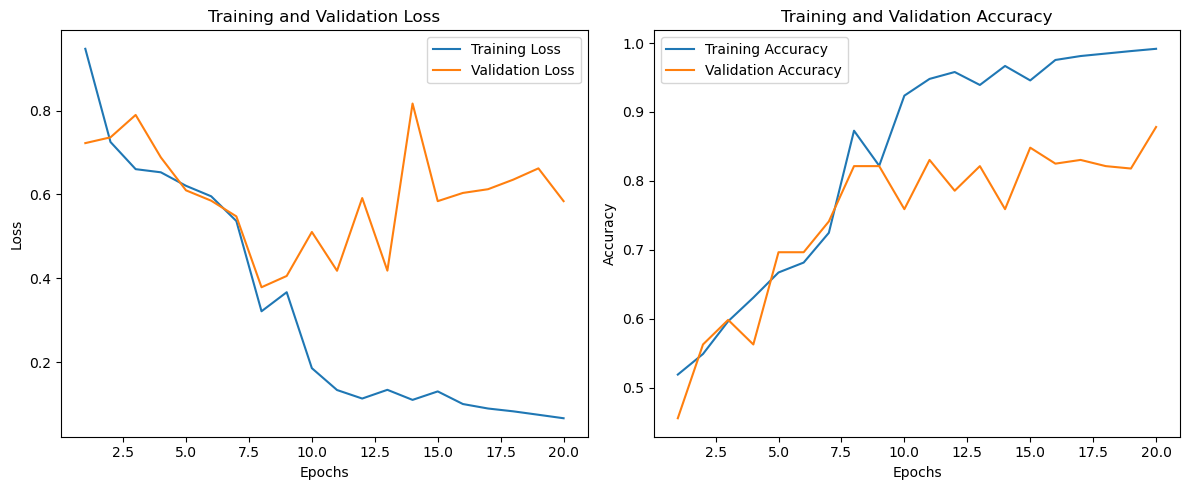

In [12]:
# Plot training and validation accuracy and loss
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Save the plot
plot_path = f"{save_path}/training_plots.png"
plt.savefig(plot_path)
plt.show()
print(f"Plots saved to {plot_path}")


In [13]:
test_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset/test"
# Load the test dataset
test_data = datasets.ImageFolder(root=val_path, transform=transform)

# Create a DataLoader for the test dataset
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

model.eval()

# Initialize tracking variables
test_loss = 0.0
correct_preds = 0
total_preds = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        # Get predictions
        _, preds = torch.max(outputs, 1)
        correct_preds += torch.sum(preds == labels).item()
        total_preds += labels.size(0)

# Compute final loss and accuracy
test_loss /= len(test_loader)
test_accuracy = correct_preds / total_preds

print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


Test Accuracy: 0.8482, Test Loss: 0.5839


In [14]:
test_results = pd.DataFrame({
    'Metric': ['Test Loss', 'Test Accuracy'],
    'Value': [test_loss, test_accuracy]
})
test_results_path = f"{save_path}/test_results.csv"
test_results.to_csv(test_results_path, index=False)
print(f"Test results saved to {test_results_path}")


In [13]:

from sklearn.metrics import classification_report

all_preds = []
all_labels = []

for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

# Calculate and print the classification report
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        62
           1       0.85      0.80      0.82        50

    accuracy                           0.85       112
   macro avg       0.85      0.84      0.85       112
weighted avg       0.85      0.85      0.85       112

